# Nanothermochromism




<font size='3'> 

In this notebook, we will explore how nanotechnolgy can turn VO$_2$ thermochromic films into a technology of practical interest for the development of switchable (smart) windows. This notebook is based on the paper: S.-Y Li, G.A. Niklasson and C.G. Granqvist, Journal of Applied Physics **108**, 063525 (2010).
https://doi.org/10.1063/1.3487980

In [1]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
j = complex(0.0,1.0)

## Introduction

<font size='3'>
    
VO$_2$ is a thermochromic material, that is, VO$_2$ experiences a sharp change in its optical properties when heated above a critical temperature $\tau_c$. Below $\tau_c$, VO$_2$ is semiconducting, monoclinic and infrared transparent. Above $\tau_c$, VO$_2$ turns into tetragonal metallic and infrared reflecting.

These thermochromic properties make of VO$_2$ a very attractive material with potential applications as a coating in smart windows. In this sense, the idea is to obtain a VO$_2$-based coating with the following characteristics:

* While the temperature remains below $\tau_c$, the coating has to remain transparent in the infrared region, admiting as much solar energy as possible, helping in this way the heating system in keeping a comfortable indoor temperature. 
    
    
* Once the indoor temperature reaches $\tau_c$, the coating has to switch and start reflecting the infrared component of the solar spectrum, avoiding in this way the overheating of the building and reducing the burden of the AC system. 
    
Ideally, the critical temperture should be close to 20 °C. This can be achieved by doping VO$_2$ with e.g. Mg.
    
Also, the coating has to be as transparent as possible in the visible region. In this way the coating would not jeopardize the access to natural light and visual contact with the exterior (the whole point of having a window in the first place).

Here we will compare the optial properties of VO$_2$ thin films and VO$_2$-based nanocomposites keeping in mind an application in smart fenestration.

## VO$_2$ Refractive Index

<font size = 3> 

Caculating the optical properties of VO$_2$ films and nanocomposites requires the knowledge of its complex refractive index. In the box below we load the complex refractive index of VO$_2$ below and above $\tau_c$. These values are taken from the paper: N.R. Mlyuka, G. A. Niklasson and C. G. Granqvist, Phys. Status Solidi A, **206**, 2155 (2009). https://doi.org/10.1002/pssa.200881798

In [2]:
wl, n, k = np.loadtxt('VO2_nk.txt', unpack = True)
wlh, nh, kh = np.loadtxt('VO2H_nk.txt', unpack = True)
l= len(wlh)
VO2 = np.array([complex(1.0,0.0)] * l)
VO2H = np.array([complex(1.0,0.0)] * l)
i = 0
while i < l:
  VO2[i] = np.array([complex(n[i],k[i])])
  VO2H[i] = np.array([complex(nh[i],kh[i])])
  i += 1

<font size='3'> Now, the arrays ``` VO2``` and ``` VO2H``` contain the complex refractive index of VO$_2$ below and above $\tau_c$, respectively. We can these indices and hence visualize the thermochromic transition:

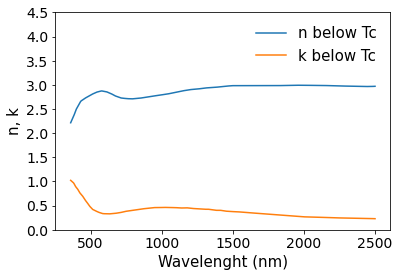

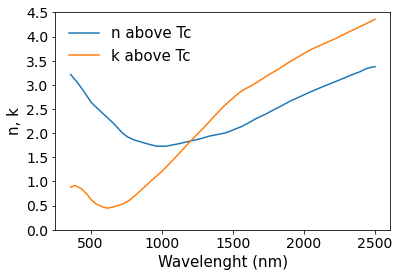

In [3]:
plt.plot(wl,n, label='n below Tc')
plt.plot(wl,k, label='k below Tc')
plt.xlabel("Wavelenght (nm)",fontsize = 15)
plt.ylabel("n, k",fontsize= 15)
plt.ylim([0, 4.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize= 15,frameon=False)
plt.show()
plt.plot(wl,nh, label='n above Tc')
plt.plot(wl,kh, label='k above Tc')
plt.xlabel("Wavelenght (nm)",fontsize = 15)
plt.ylabel("n, k",fontsize= 15)
plt.ylim([0, 4.5])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize= 15,frameon=False)
plt.show()

## VO$_2$ thin films

<Font Size = 3> For calculating the transmittance $T$ of VO$_2$ thin films we will need also the refractive index of the substrate (in our case glass), wich we asume equal to 1.52, real and constant in the waveleght range of interest. The refractive index of the medium, which is air, is equal to 1.0. Air and glass refractive indexes are kept in the arrays ``` GLASS ``` and ``` AIR```:

In [4]:
GLASS = np.array([complex(1.52,0.0)] * l)
AIR = np.array([complex(1.0,0.0)] * l)

<font size='3'>  We define the function ``` T(N1,N2,N3,d) ```, which admits as inputs the refractive index of the medium, the film and the substrate (``` N1 ```, ``` N2 ```, ``` N3 ```, respectively) and ``` d ``` (thickness in nm). The function ``` T(N1,N2,N3,d) ```returns the transmittance $T$ of the thin film in this conditions.

In [5]:
def T(N1,N2,N3,d):
	delta= -(2.0*np.pi/wl)*N2*d
	r1= (N1-N2)/(N1+N2)
	r2= (N2-N3)/(N2+N3)
	t1 = 2*N1/(N1+N2)
	t2 = 2*N2/(N2+N3)
	t = (t1*t2*np.exp(-j*delta))/(np.array([1]*l)+r1*r2*np.exp(-2*j*delta))
	z = N3/N1
	return z.real*abs(t)*abs(t)*100	

<font size='3'> Now we are in conditions of caclulating (and plotting)  the transmittance curves for an VO$_2$ film (50 nm-thick) below and above the crytical temperature:

In [6]:
T_VO2= T(AIR, VO2, GLASS, 50)
T_VO2H=T(AIR, VO2H,GLASS, 50)

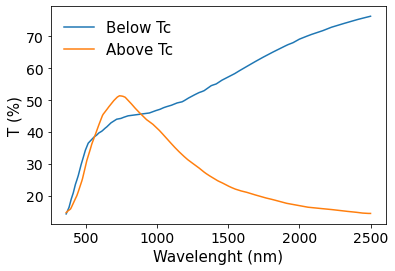

In [7]:
plt.plot(wl,T_VO2, label='Below Tc')
plt.plot(wl,T_VO2H, label='Above Tc')
plt.xlabel("Wavelenght (nm)",fontsize = 15)
plt.ylabel("T (%)",fontsize = 15)
plt.legend(loc='best', fontsize= 15,frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## VO$_2$ nanoparticles diluted in a dielectric matrix

<font size = '3'> Now, instead of a thin film, we are going to assume a dispersion of VO$_2$ nanoparticles particles embedded in a dielectric matrix of refractive index real and equal to 1.52. This applies to glass, but also to many other polymers. 
    
<font size = '3'> We are going to assume that the dispersion of VO$_2$ particles satisfies the conditions that will allow us the application of the Maxwell-Garnett approximation: isolated particles of sizes much smaller than the wavelenght.
    
<font size = '3'> Accordingly, the complex dielectric function $\tilde{\varepsilon}_{mg}$ of the composite VO$_2$/glass can be calculated using $\varepsilon_g$ and $\varepsilon_{VO2}$, that is the dielectric functions of glass and VO$_2$, using the formula:
    
\begin{equation}
\tilde{\varepsilon}_{mg} = \varepsilon_g\frac{1+\frac{2}{3}f\alpha_{pol}}{1-\frac{1}{3}f\alpha_{pol}},
\end{equation}

<font size = '3'> being $f$ the filling factor (volume fraction of the particles in the medium) and $\alpha_{pol}$ the polarizability of the particles. For spherical particles:
    
\begin{equation}
    \alpha_{pol} = \frac{\varepsilon_{VO2}-\varepsilon_g}{\varepsilon_g+\frac{1}{3}(\varepsilon_{VO2}-\varepsilon_g)}.
\end{equation}

<font size = '3'> Below, we calculate the dielectric functions of VO$_2$ below and above $\tau_c$, ```EVO2```and ```EVO2H```, as well as the dielectric function of glass ```EGLASS```:

In [8]:
EVO2 = VO2**2
EVO2H = VO2H**2
EGLASS = GLASS**2

<font size = '3'> We assume a filling factor f = 0.01 (i.e. 1 %  in volume):

In [9]:
f=0.01

<font size = '3'> From the box below, we obtain ```nmgcomplex```, that is, the refractive index of a VO$_2$/glass composite comprised of spherical  VO$_2$  particles dispersed in a glass matrix in which they occupy 1% in volume and kept below $\tau_c$. Below we obtain also ```nmgcomplexH``` for the analogous case in which the composite is kept above $\tau_c$. Both are calculated from their respective polarizability factos ```alpha_pol``` and ```alpha_polH```.

In [10]:
alpha_pol = np.subtract(EVO2,EGLASS)/(EGLASS+(1.0/3.0)*(EVO2-EGLASS))
alpha_polH = np.subtract(EVO2H,EGLASS)/(EGLASS+(1.0/3.0)*(EVO2H-EGLASS))
nmgcomplex = np.sqrt(EGLASS*(1.0+(2.0/3.0)*f*alpha_pol)/(1.0-(1.0/3.0)*f*alpha_pol))
nmgcomplexH = np.sqrt(EGLASS*(1.0+(2.0/3.0)*f*alpha_polH)/(1.0-(1.0/3.0)*f*alpha_polH))

<font size = '3'> We can now calculate (and plot) the transmittance of such composite in both situations, below and avobe $\tau_c$. For this we can call the function ```T(N1,N2,N3,d)``` defined previously. We are going to assume 5000 nm as the thickness ```d```for the composite. Since $f=0.01$, this equivalent in content to a 50 nm thick VO$_2$ film like the one calculated before.

In [11]:
T_VO2P= T(AIR, nmgcomplex, GLASS, 5000)
T_VO2PH= T(AIR, nmgcomplexH, GLASS, 5000)

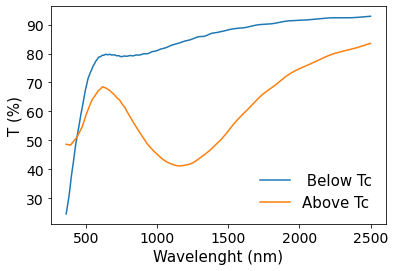

In [12]:
plt.plot(wl,T_VO2P, label=' Below Tc')
plt.plot(wl,T_VO2PH, label='Above Tc')
plt.xlabel("Wavelenght (nm)",fontsize = 15)
plt.ylabel("T (%)",fontsize = 15)
plt.legend(loc='best', fontsize= 15,frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Discussion: films vs. composites

<font size = 3>
Why are VO$_2$ nanocomposites more useful for smart window applications?

To answer this question we are going to load the solar irradiance on the earth suface (Annal book of ASTM Standards) and the efficiency of the human eye (G. Wyszecki and W. Stiles, Color Science: Concepts and Methods, Quantitative Data and Formulae, New York, NY, USA: Wiley, 2nd ed., 2000) both as a function of wavelenght. 

In [13]:
wleye, Efficiency = np.loadtxt('eye1.txt', unpack = True)
wlirr, Irradiance = np.loadtxt('iso9845tot.txt', unpack = True)

<font size = 3> Next are going to compare the spectral distribution of the solar irradiance and the efficiency of the human eye with the transmittance trace of VO$_2$ nanocomposites and thin films as calculated before.

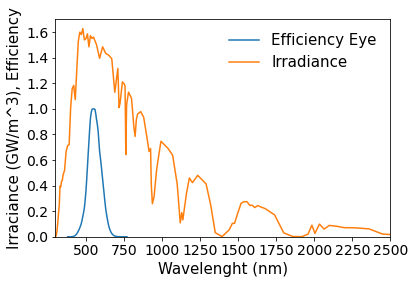

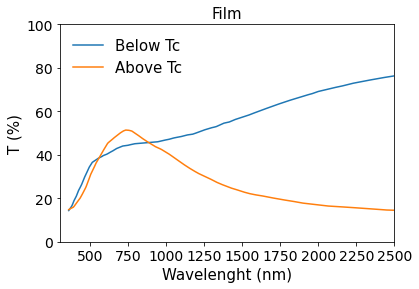

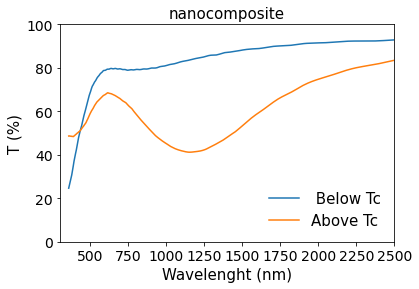

In [14]:
plt.plot(wleye,Efficiency/100, label='Efficiency Eye')
plt.plot(wlirr,Irradiance/1000, label='Irradiance')
plt.xlabel("Wavelenght (nm)",fontsize = 15)
plt.ylabel("Irraciance (GW/m^3), Efficiency",fontsize = 15)
plt.legend(loc='best', fontsize= 15,frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([300, 2500])
plt.ylim([0, 1.7])
plt.show()

plt.plot(wl,T_VO2, label='Below Tc')
plt.plot(wl,T_VO2H, label='Above Tc')
plt.title("Film",fontsize= 15)
plt.xlabel("Wavelenght (nm)",fontsize = 15)
plt.ylabel("T (%)",fontsize = 15)
plt.legend(loc='best', fontsize= 15,frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([300, 2500])
plt.ylim([0, 100])
plt.show()

plt.plot(wl,T_VO2P, label=' Below Tc')
plt.plot(wl,T_VO2PH, label='Above Tc')
plt.title("nanocomposite",fontsize= 15)
plt.xlabel("Wavelenght (nm)",fontsize = 15)
plt.ylabel("T (%)",fontsize = 15)
plt.legend(loc='best', fontsize= 15,frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([300, 2500])
plt.ylim([0, 100])
plt.show()

### Questions

<font size = 3>
    
* Is the optical transmittance of this VO$_2$ film in the visible region adequate for a window? 
    
    
    
* As observed, the maximum transmittance modulation provided by the VO$_2$ film takes place at around 2500 nm and longer wavelengths. How is the solar irradiance in this spectral region? Can we use this switching for the fabrication of a smart window?

    
    
* Attending to $T$ in the visible region, and with a window application focus, why would it be advantageous to use a dispersion of VO$_2$ nanoparticles rather than a VO$_2$ thin film?
    
    

* Is the thermochromic response of the composite also advantageous in the near-infrared region? 
   
    